In [1]:
# coding=utf-8
from scapy.all import *
import binascii
import struct
import time

import crcmod
import libnum

from scapy.layers.inet import IP, UDP
from scapy.layers.l2 import Ether

import numpy as np

plc_cube = []
hmi_cube = []

def packet_analysis(pkt):
    if TCP in pkt:
        #print(pkt[TCP].dport)
        #print(len(pkt[TCP].payload))
        if len(pkt[TCP].payload) > 6:
            d_time = float(str(pkt.time))
            #print(type(d_time))
            #print(dir(pkt[TCP]))
            #print(pkt.summary())
            #print(pkt.time)
            #print(binascii.hexlify(bytes(pkt[TCP].payload))[12:])
            #print(type(float(pkt.time)))
            if(pkt[TCP].dport == 502):
                #plc_cube.append([d_time,binascii.hexlify(bytes(pkt[TCP].payload))[12:]])
                plc_cube.append(d_time)
            else:
                #hmi_cube.append([d_time,binascii.hexlify(bytes(pkt[TCP].payload))[12:]])
                hmi_cube.append(d_time)


In [2]:
try:
    #print(ifaces)
    #sniff(iface="Realtek PCIe GbE Family Controller", prn=packet_analysis, filter="udp port 18507")
    sniff(offline='DataSet/modbus_normal_oper001.pcapng', prn=packet_analysis)
    plc_cube = np.asarray(plc_cube)
    hmi_cube = np.asarray(hmi_cube)
    print('Completed')

except Exception as sniff_dec_err:
    traceback.print_exc()
    print(str(sniff_dec_err))

Completed


In [3]:
print(hmi_cube.shape)
print(plc_cube.shape)

(3110,)
(3110,)


In [4]:
print(hmi_cube)

[1.61409126e+09 1.61409126e+09 1.61409126e+09 ... 1.61409181e+09
 1.61409181e+09 1.61409181e+09]


In [5]:
print(plc_cube)

[1.61409126e+09 1.61409126e+09 1.61409126e+09 ... 1.61409181e+09
 1.61409181e+09 1.61409181e+09]


In [6]:
fourier = np.fft.fft(hmi_cube)

In [7]:
print(fourier)

[ 5.01982467e+12+8.72612000e-05j  9.16166840e+01+2.73418479e+05j
 -2.48260321e+00+1.36564913e+05j ...  8.12808459e+01-9.11157884e+04j
 -2.48264071e+00-1.36564913e+05j  9.16168666e+01-2.73418479e+05j]


In [8]:
hmi_diff = np.diff(hmi_cube)

In [9]:
print(hmi_diff)

[0.00598788 0.00600719 0.09997392 ... 0.00497699 0.09148693 0.17351198]


[[0.   0.01 0.02 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01
  0.01 0.   0.   0.01 0.01 0.02 0.04 0.02 0.   0.02 0.01 0.02 0.02 0.01
  0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.01 0.   0.02 0.   0.01 0.01 0.02 0.01
  0.   0.   0.02 0.02 0.   0.   0.01 0.02 0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2
  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34
  0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48
  0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62
  0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76
  0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9
  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99]]


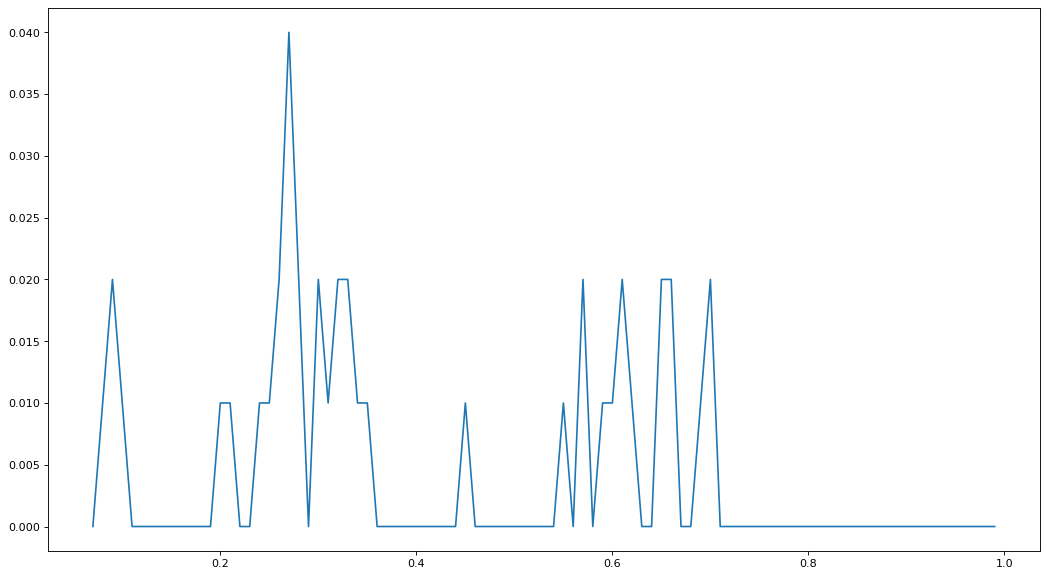

In [62]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')

hist, bin_edges = np.histogram(hmi_diff[:100], bins=100, range=(0.0,1.0), density=True)
bin_edges = bin_edges[7:-1]
prob = hist[7:]/100
#print(sum(hist))
mat = np.vstack((prob,bin_edges))
print(mat)
plt.plot(bin_edges,prob)

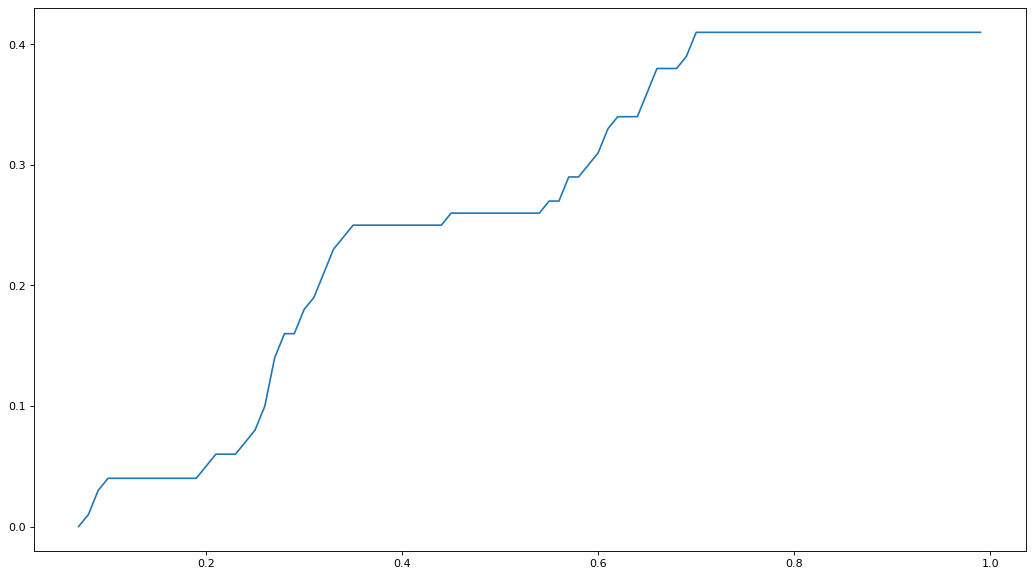

In [63]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')

cdf = [0]
for i in range(len(prob)):
    cdf.append(cdf[i] + prob[i])
    
plt.plot(bin_edges,cdf[1:])

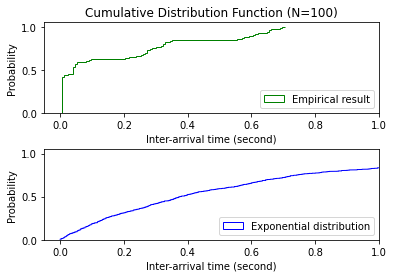

In [11]:

import numpy as np
import matplotlib.pyplot as plt

#fig1, ax = plt.subplots()

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0.4)

#### First, plot the empirical result
y = hmi_diff[:100]
n_bins = len(y)-1
n, bins, patches = ax1.hist(y, n_bins, density=True, histtype='step',
          cumulative=True, label='Empirical result', color='g')
# the following line is used to remove the last point
patches[0].set_xy(patches[0].get_xy()[:-1])
ax1.set_xlim(-0.05, 1.0)
ax1.set_xlabel('Inter-arrival time (second)')
ax1.set_ylabel('Probability')
ax1.set_title('Cumulative Distribution Function (N=100)')
ax1.legend(loc=4)

#### Then plot the theoretical expontential distribution
G = np.random.default_rng()
y = G.exponential(scale=0.55, size=898)
# Now, plot the cumulative distributioin function (CDF)
n_bins = len(y)-1
n, bins, patches = ax2.hist(y, n_bins, density=True, histtype='step',
          cumulative=True, label='Exponential distribution', color='b')
# the following line is used to remove the last point
patches[0].set_xy(patches[0].get_xy()[:-1])
ax2.set_xlim(-0.05, 1.0)
ax2.set_xlabel('Inter-arrival time (second)')
ax2.set_ylabel('Probability')
#ax2.set_title('Cumulative Distribution Function (N=100)')
ax2.legend(loc=4)

plt.show()
#plt.savefig('./cdf.pdf')

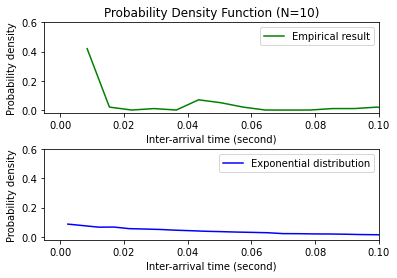

In [12]:
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0.4)

#### First, plot the p.d.f. of our empirical result
y = hmi_diff[:100]
heights, bins = np.histogram(y, bins=100)
# do normalization
heights = heights/float(sum(heights))
binMids = bins[:-1]+np.diff(bins)/2.
ax1.plot(binMids, heights, label='Empirical result', color='g')
ax1.set_xlim(-0.005, 0.1)
ax1.set_ylim(-0.02, 0.6)
ax1.set_xlabel('Inter-arrival time (second)')
ax1.set_ylabel('Probability density')
ax1.set_title('Probability Density Function (N=10)')
ax1.legend(loc=1)

#### Now, plot the p.d.f. of exponential distribution
G = np.random.default_rng()
y = G.exponential(scale=0.055, size=9010)
heights, bins = np.histogram(y, bins=100)
# do normalization
heights = heights/float(sum(heights))
binMids = bins[:-1]+np.diff(bins)/2.
ax2.plot(binMids, heights, label='Exponential distribution', color='b')
ax2.set_xlim(-0.005, 0.1)
ax2.set_ylim(-0.02, 0.6)
ax2.set_xlabel('Inter-arrival time (second)')
ax2.set_ylabel('Probability density')
ax2.legend(loc=1)

plt.show()


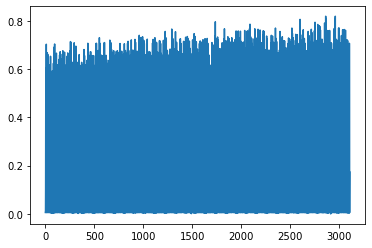

In [13]:
plt.plot(hmi_diff)
plt.show()

In [14]:
freqs = np.fft.fftfreq(len(hmi_diff))

In [15]:
for coef,freq in zip(fourier,freqs):
    if coef:
        print('{c:>6} * exp(2 pi i t * {f})'.format(c=coef,f=freq))

(5019824669844.743+8.726119995117188e-05j) * exp(2 pi i t * 0.0)
(91.61668400208487+273418.4785812341j) * exp(2 pi i t * 0.000321646831778707)
(-2.4826032139794734+136564.91317098256j) * exp(2 pi i t * 0.000643293663557414)
(81.28089800414807+91115.7882598865j) * exp(2 pi i t * 0.0009649404953361209)
(79.47025191401656+68183.75033373028j) * exp(2 pi i t * 0.001286587327114828)
(-1266.6503732625847+54994.72899396968j) * exp(2 pi i t * 0.0016082341588935349)
(-246.84576191817587+45526.996164987875j) * exp(2 pi i t * 0.0019298809906722419)
(-218.52289908596276+39007.61954662209j) * exp(2 pi i t * 0.002251527822450949)
(-288.0122451271609+34163.239942052256j) * exp(2 pi i t * 0.002573174654229656)
(-259.1028941344398+30398.68671209761j) * exp(2 pi i t * 0.0028948214860083626)
(-208.40416355534353+27138.572609999235j) * exp(2 pi i t * 0.0032164683177870698)
(-228.618222178206+24820.72560833946j) * exp(2 pi i t * 0.003538115149565777)
(-231.91194418946225+22752.5183856601j) * exp(2 pi i t * 

(-276.84753302878676-116.94315393179761j) * exp(2 pi i t * -0.3782566741717594)
(-276.20626975456855-108.41927028325173j) * exp(2 pi i t * -0.3779350273399807)
(-276.53411274295263-114.82450025766784j) * exp(2 pi i t * -0.377613380508202)
(-275.9787646671726-109.58961438880735j) * exp(2 pi i t * -0.37729173367642327)
(-278.4328735067197-113.44642784892383j) * exp(2 pi i t * -0.37697008684464456)
(-277.4569645217494-117.1092919400614j) * exp(2 pi i t * -0.37664844001286585)
(-274.5272131946176-116.82118057868998j) * exp(2 pi i t * -0.37632679318108714)
(-274.38821482513254-108.79412196183847j) * exp(2 pi i t * -0.3760051463493085)
(-273.91331202725297-113.81710210732469j) * exp(2 pi i t * -0.3756834995175298)
(-268.17878712289206-109.51024272831592j) * exp(2 pi i t * -0.37536185268575106)
(-279.613172249268-109.35957830645918j) * exp(2 pi i t * -0.37504020585397235)
(-282.7979124862192-106.1254723127316j) * exp(2 pi i t * -0.37471855902219364)
(-280.12979477565494-115.76131624321545j) *

[[0.   0.   0.05 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.05 0.   0.   0.   0.   0.   0.05 0.05 0.   0.   0.05 0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.05 0.   0.
  0.   0.   0.05 0.05 0.   0.   0.   0.05 0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2
  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34
  0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48
  0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62
  0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76
  0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9
  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99]]


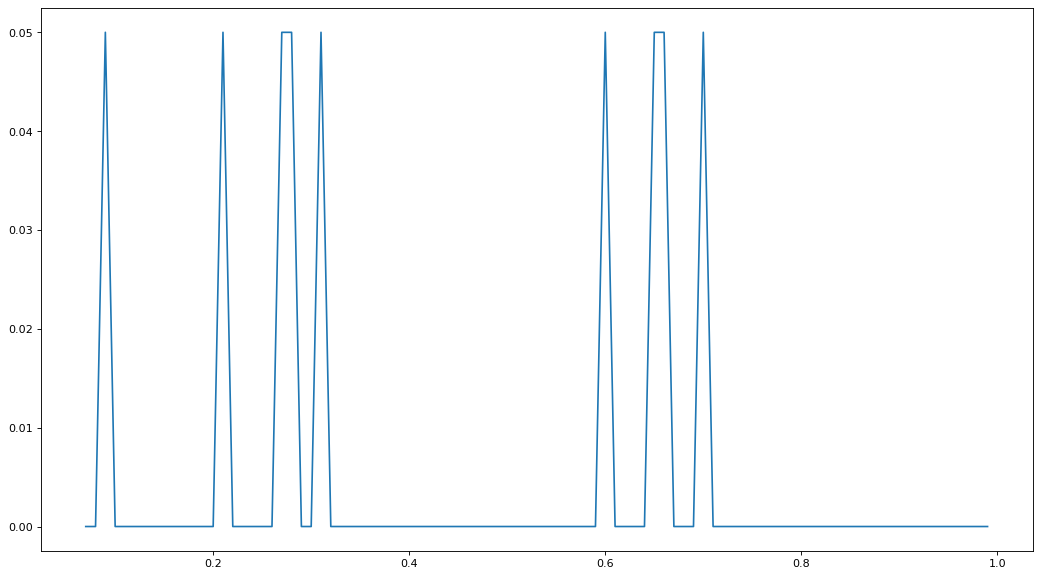

In [65]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')

hist, bin_edges = np.histogram(hmi_diff[:20], bins=100, range=(0.0,1.0), density=True)
bin_edges = bin_edges[7:-1]
prob = hist[7:]/100
#print(sum(hist))
mat = np.vstack((prob,bin_edges))
print(mat)
plt.plot(bin_edges,prob)